In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

In [2]:
#Means-->>
mean1 = np.array([1 , 1])
mean2 = np.array([7 , 7])
mean3 = np.array([13 , 1])

#Covariances-->>
cov1 = np.array([[1,2] , [2,1]])
cov2 = np.array([[1,2] , [2,1]])
cov3 = np.array([[1,2] , [2,1]])

#Generating Data
data1 = np.random.multivariate_normal(mean1 , cov1 , 200)
data2 = np.random.multivariate_normal(mean2 , cov2 , 200)
data3 = np.random.multivariate_normal(mean3 , cov3 , 200)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


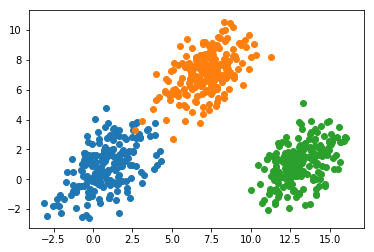

In [3]:
#Plotting Data
plt.figure(0)
plt.scatter(data1[ : , 0] , data1[ : , 1])
plt.scatter(data2[ : , 0] , data2[ : , 1])
plt.scatter(data3[ : , 0] , data3[ : , 1])

In [4]:
data = np.concatenate((data1 , data2 , data3) , axis=0)
print data.shape

(600, 2)


In [5]:
def distance(x1 , x2):
    return np.sqrt(((x1-x2)**2).sum())

In [6]:
#n=how many time u want to run the loop
def k_means(n , k , data):
    #dictionary for storing points  , centres and colors
    #key-->>cluster numbers
    #values-->>points , centers , colors
    clusters = {}

    colors = ['red' , 'green' , 'yellow' , 'blue' , 'pink']

    for kx in range(k):
        cluster_id = kx
        points = []
        dim = data.shape[1]#number of columns
        #print dim
        #initialising centers
        center = 10 * (np.random.random((dim , ))*2 - 1)#??????????????????
        color = colors[kx]
        clusters[cluster_id] = {
            'points' : points ,
            'center' : center ,
            'color' : color
        }
    
    #print clusters
    
    
    for i in range(n):
        for ix in range(data.shape[0]):
            #For each point get distance with each center
            dist = []
            #for one loop execution we are calculating distance of 1 row with all centers
            #i.e. we are applying one more loop
            for kx in range(k):
                d = distance(data[ix]  , clusters[kx]['center'])
                dist.append(d)
            c_id = np.argmin(dist)#c_id will have the value of cluster to which point is at least distance
            #and now our task is to put that point in the points list of that clusters
            
            clusters[c_id]['points'].append(data[ix])
            
        
        #Obtaining new centers
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            #print type(pts)
            #print type(clusters[kx]['points'])
            if pts.shape[0]>0:
                #compute new centers
                new_center = pts.mean(axis = 0)
            else:
                new_center = clusters[kx]['center']
                
            clusters[kx]['points']  = pts
            #for plotting we need arrays not lists that's why we store array of points in points
            clusters[kx]['center'] = new_center
        

        #Plotting for Visual
        plt.figure(0)
        for kx in range(k):
            cc = clusters[kx]['center']
            pts = clusters[kx]['points']
            
            try:
                plt.scatter(pts[: , 0] , pts[: , 1]  ,color = clusters[kx]['color'])
                
            except:
                pass
            
            #Plotting centers
            plt.scatter(cc[0] , cc[1] , color='black' , s=100 , marker = '^')

            #now we need to empty points list
            
            print clusters[kx]['center']
            clusters[kx]['points'] = []
        plt.show()
        #print clusters[0]['points']
            
       
            
            
             
            
    

Enter the value of n5
[8.83578008 4.52026711]
[ 6.98070206 -0.19305066]
[-0.34303648  0.25904245]


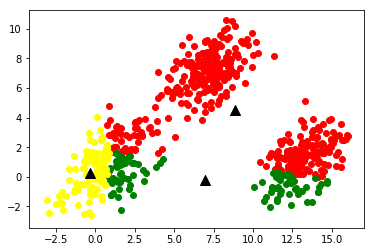

[9.8326277  4.86437997]
[11.08328426 -0.20719515]
[0.73449628 0.86679225]


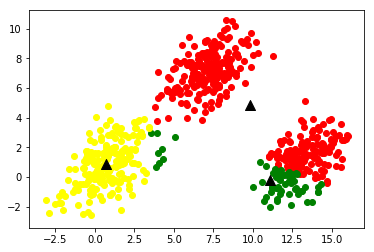

[7.56068896 7.01950801]
[13.08336178  0.94472401]
[0.93147831 0.97554939]


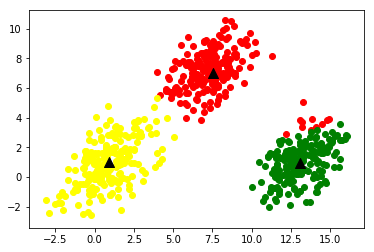

[7.16483333 7.16963839]
[13.1180757   1.09565666]
[0.8842061  0.92101015]


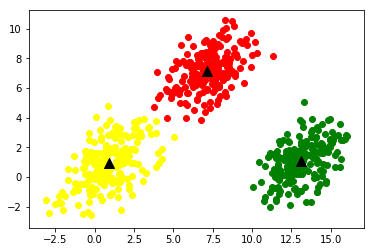

[7.16483333 7.16963839]
[13.1180757   1.09565666]
[0.8842061  0.92101015]


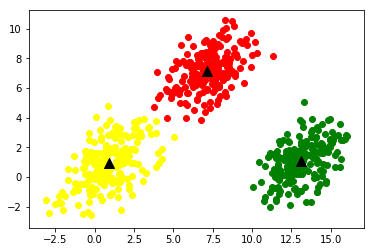

In [8]:
#Calling the function
n = int(raw_input("Enter the value of n"))
k_means(n , 3 , data)